# Guided Programming 2 - Solving Simultaneous Equations

**Mathematical Methods for Chemical Engineers (MTHS1008)**

**Dr Matthew Scase**

We are going to solve the simultaneous equations

\begin{equation*} 
\left\{\begin{array}{lcl} 3x + 4y &=& 2 \\ \phantom{3}x + 2y &=& 0 \end{array}\right.
\label{eq:system} \tag{1}
\end{equation*}

We will 

- Input the two equations
- Decide if the system has a unique solution or not
- Solve the equations **if** there is a unique solution
- Plot the solution (time perimitting)

## Setting up the system to be solved

We will want our code to be able to solve for the general simultaneous equation case

\begin{equation*}
\left\{\begin{array}{lcl} ax + by &=& u \\ cx + dy &=& v \end{array}\right.
\end{equation*}

Hence, we will write our code to work for general input coefficients $a$, $b$, $c$, and $d$ and a general right-hand side $u$ and $v$.

To get started however we will work with the specific equation given above in \eqref{eq:system}.  To enter the first equation in \eqref{eq:system} we therefore require $a = 3$, $b = 4$, and $u = 2$.

In [1]:
# INPUT EQUATION 3x + 4y = 2 
a = 3
b = 4
u = 2

To enter the second equation in system (1) we need to take $c = 1$, $d = 2$, and $v = 0$.

In [2]:
# INPUT EQUATION  x + 2y = 0 
c = 1
d = 2
v = 0

## Solving our system of equations

Next we need to calculate the solution of our simultaneous equations.  We will take particular care not to divide through by any quantity that might be zero to ensure we do not get a `ZeroDivisionError`.

Working in the general case again, we can begin by multiplying the first equation through by $d$ and the second equation through by $b$ to get

\begin{equation*}
\left\{\begin{array}{lcl} adx + bdy &=& du \\ bcx + bdy &=& bv \end{array}\right.
\end{equation*}

Subtracting the lower equation from the upper equation we find

\begin{equation*}
\left(ad - bc\right)x = du - bv.
\end{equation*}

This is of a form we recognize (see Lecture 1 on $ax = b$). **If** we have that $ad-bc\ne0$ we have a unique solution for $x$ given by

\begin{equation*}
x = \frac{du - bv}{ad - bc}.
\label{eq:x1sol} \tag{2}
\end{equation*}

Alternatively, we could have multiplied the first equation through by $c$ and the second equation through by $a$ to get

\begin{equation*}
\left\{\begin{array}{lcl} acx + bcy &=& cu \\ acx + ady &=& av \end{array}\right.
\end{equation*}

This time we subtract the upper equation from the lower equation to find

\begin{equation*}
\left(ad - bc\right)y = av - cu.
\end{equation*}

Again, this is of a form we recognize and again, **if** we have that $ad-bc\ne0$ we have a unique solution for $y$ given by

\begin{equation*}
y = \frac{av - cu}{ad - bc}.
\label{eq:x2sol} \tag{3}
\end{equation*}

We observe that **if** $ad - bc \ne 0$ we have a unique solution for our system and we can evaluate our solution in Python using \eqref{eq:x1sol} and \eqref{eq:x2sol}.  

**If** we have a unique solution we will store our solution in the variables `x` and `y` and then print out our solution.

In [3]:
# CALCULATE SOLUTION

x = (d*u - b*v)/(a*d - b*c)
y = (a*v - c*u)/(a*d - b*c)
print('Solution: x =', x, ', y =', y)

Solution: x = 2.0 , y = -1.0


In [4]:
# CALCULATE SOLUTION OR TELL USER IF THERE IS NOT A UNIQUE SOLUTION

if a*d - b*c == 0: # Check to see if ad - bc = 0
    print('No unique solution')
else:
    x = (d*u - b*v)/(a*d - b*c)
    y = (a*v - c*u)/(a*d - b*c)
    print('Solution: x =', x, ', y =', y)

Solution: x = 2.0 , y = -1.0


In [5]:
# CALCULATE SOLUTION OR TELL USER IF THERE ARE INFINITELY MANY OR NO SOLUTIONS

if a*d - b*c == 0: # Check to see if ad - bc = 0
    print('No unique solution')
    if u*d - b*v == 0 and a*v - c*u == 0:
        print('Infinitely many solutions')
    else:
        print('No solutions')
else:
    x = (d*u - b*v)/(a*d - b*c)
    y = (a*v - c*u)/(a*d - b*c)
    print('Solution: x =', x, ', y =', y)

Solution: x = 2.0 , y = -1.0


## Exercise

- Modify the code so that the user can input their equations without having to change the program.  You can do this using the
        
        variable = float(input('Text Prompt'))
        
    command.
    
## Plotting our equations

To plot these two equations we choose a horizontal range, say $0 \leqslant x \leqslant 4$, and can find the corresponding values of $y$ by rearranging our general equations.  For the first equation
\begin{equation*}
ax + by = u \quad\Rightarrow\quad y = \frac{u - ax}{b}.
\tag{4}
\end{equation*}
[We can observe that this is a straight line as it is in the form $y = mx + c$ where the gradient of our straight line is given by $m = -a/b$ and the intercept at $x=0$ is given by $y = u/b$.]

For the second equation
\begin{equation*}
cx + dy = v \quad\Rightarrow\quad y = \frac{v - cx}{d}.
\tag{5}
\end{equation*}

As we wish to plot some lines we need to import the `matplotlib.pyplot` Python plotting tools.  To save ourselves typing out `matplotlib.pyplot.plot( ... ` each time we will import the module `as plt`.

In [6]:
import matplotlib.pyplot as plt

There are many ways to plot a straight line in Python.  One method is to specify two points in the $(x, y)$ plane and get Python to plot the two points connected by a straight line.  This is what we will do here.

We would like the horizontal range to be $0 \leqslant x \leqslant 4$.  We are therefore going to draw a straight line between two points, the first point will have $x$-coordinate 0 and the second point will have $x$-coordinate 4.  We can input this into Python as

    x_points = [0, 4]
    
This defines a variable called `x_points` that is a [**list**](https://www.tutorialspoint.com/python/python_lists.htm) that contains two entries.  `x_points[0]` contains the $x$-coordinate of the first point defining our line.  `x_points[1]` contains the $x$-coordinate of the second point defining our line.

We now need to calculate the two $y$-coordinates that correspond to these two $x$-coordinates.  One way to do this is using a [**list comprehension**](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python).  For our first equation we know that given an $x$ value we have a corresponding $y$ value given by (4).  So we write

    y_points = [(u - a*x)/b for x in x_points]
    
Here Python works through every value of `x` that it finds in the list `x_points`, calculates the new number $(u - ax)/b$ for that value of `x`, and then adds this new number to the list `y_points`.

In [7]:
list_variable = ['cats', 'dogs', 'fish']
print(list_variable[0])

cats


In [8]:
x_points = [0, 4]
y_points = [(u - a*x)/b for x in x_points]
print('x_points =', x_points)
print('y_points =', y_points)

x_points = [0, 4]
y_points = [0.5, -2.5]


We see that `y_points` is a list containing the two $y$-coordinate points that correspond to the two $x$-coordinate points in `x_points`.  We can now plot the line representing the first equation using the `plt.plot` command.  The format is

    plt.plot(x-coordinates, y-coordinates, plotting format)
    
If we want Python to join our points together with a straight line we use the plotting format `'-'`.  Other plotting styles are also available, *e.g.*, individual data points `'o'`, a dashed line `'--'`, individual data points connected by straight lines `'o-'`.  

To plot our first equation therefore we use

    plt.plot(x_points, y_points, '-')

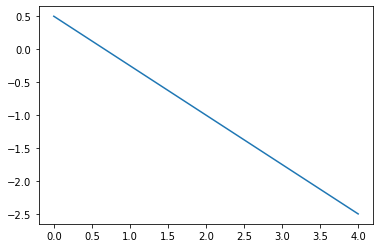

In [9]:
plt.plot(x_points, y_points, '-');

Python has plotted a straight line connecting the first point $(0, 0.5)$ to the second point $(4, -2.5)$ which corresponds to our equation $3x + 4y = 2$.  Everywhere on this line this equation is true.

Let us plot both equations and label our axes using the

    plt.xlabel('x label text')
    plt.ylabel('y label text')
    
commands.

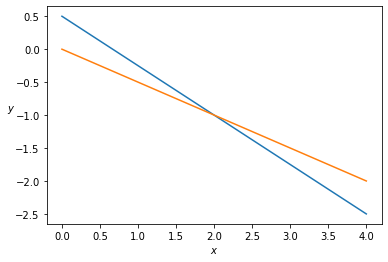

In [10]:
# Set Range for plotting
x_points = [0, 4]
# ........... Plot First equation (blue)
y_points = [(u - a*x)/b for x in x_points]
plt.plot(x_points, y_points, '-')
# ........ Plot Second equation (orange)
y_points = [(v - c*x)/d for x in x_points]
plt.plot(x_points, y_points, '-')
# ........................... Label axes
plt.xlabel('$x$')
plt.ylabel('$y$', rotation = 0);

The blue line connects the two points $(0, 0.5)$ and $(4, -2.5)$ which corresponds to our equation $3x + 4y = 2$.  The orange line connects the two points $(0, 0)$ and $(4, -2)$ which corresponds to our equation $x + 2y = 0$.  

At the special point where the two lines cross, the values of $x$ and $y$ make both of our equations true at the same time, i.e., *simultaneously*.

Finally we plot our solution and observe that it is the unique point that lies on both lines representing our equations in (1), *i.e.*, the solution lies at the intersection of the two lines.

To plot the single point $(x, y)$ as a round data point we can use the plotting format `'o'`

    plt.plot(x, y, 'o')
    
The colours that have been chosen for our two equations and the solution are selected automatically.  We can force Python to choose colours of our specification if we wish.

Finally we need to provide a key or `legend` for the different elements of our plot.  We can use the `plt.legend` command which requires a list of text strings that correspond to the plotted elements in the order in which we plotted them.  In this case therefore we use

    plt.legend(['Equation 1', 'Equation 2', 'Solution'])

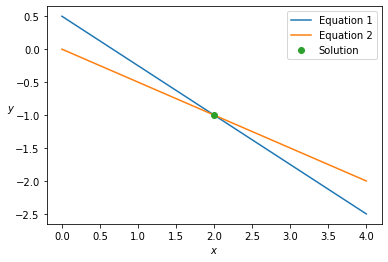

In [11]:
# Set Range for plotting
x_points = [0, 4]
# ........... Plot First equation (blue)
y_points = [(u - a*x)/b for x in x_points]
plt.plot(x_points, y_points, '-')
# ........ Plot Second equation (orange)
y_points = [(v - c*x)/d for x in x_points]
plt.plot(x_points, y_points, '-')
# ................ Plot Solution (green)
plt.plot(x, y, 'o')
# ........................... Label axes
plt.xlabel('$x$')
plt.ylabel('$y$', rotation = 0);
plt.legend(['Equation 1', 'Equation 2', 'Solution']);